In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os

In [37]:
loadpath = f'{h08dir}/wsi/dat/lpd/lpd.npy'
tmp = np.load(loadpath)
print(tmp[2].shape)

(3,)


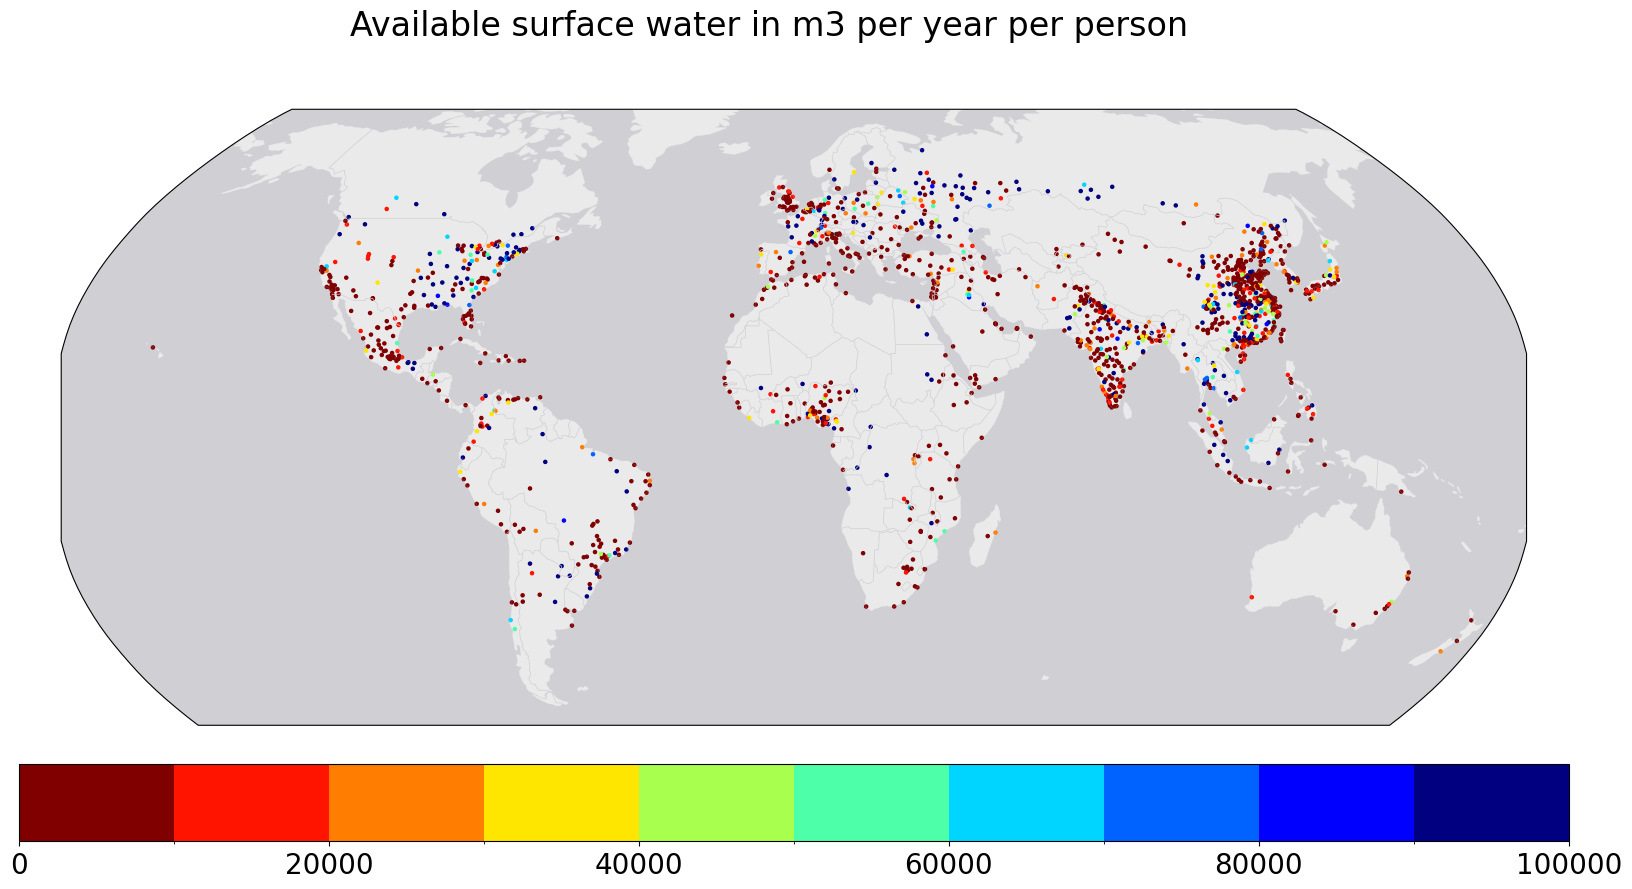

In [39]:
import matplotlib.colors as mcolors

cmap = plt.get_cmap('jet_r', 10)  # 10個の離散値
bounds = np.linspace(0, 1e5, 11)  # 0から100までの範囲を10分割
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 20
projection = ccrs.Robinson(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([-180, 180, -60, 75], crs=crs)
img = ax.scatter(
              tmp[:, 0], 
              tmp[:, 1], 
              c=tmp[:, 2]*365/1000, 
              s=5, 
              cmap= cmap,
              norm = norm,
              transform=ccrs.PlateCarree(), 
             )
#ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()

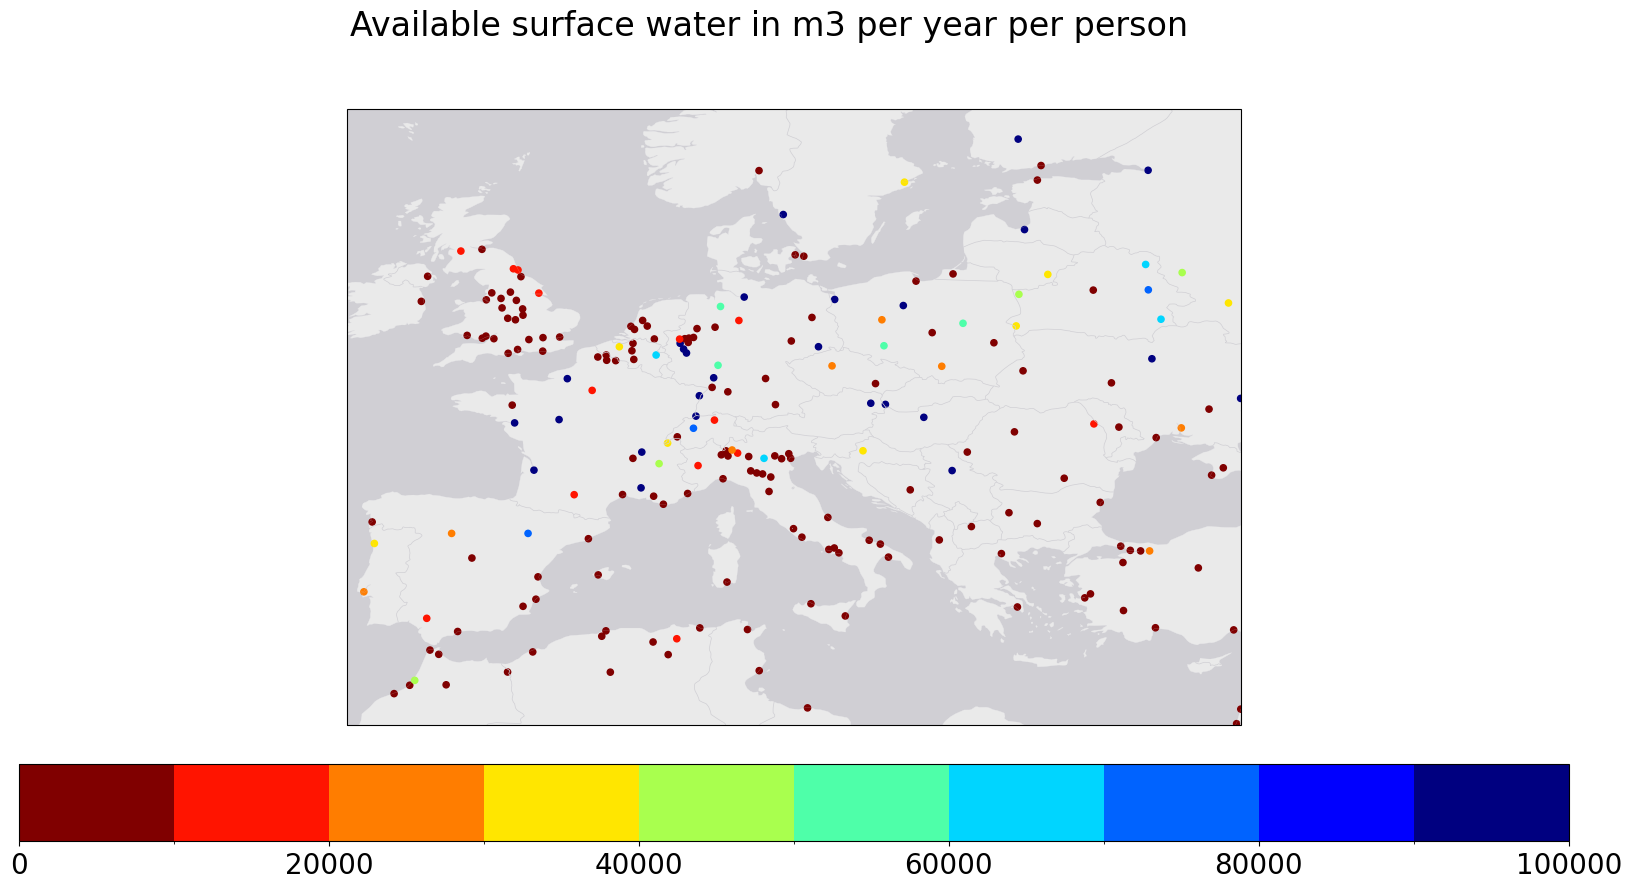

In [31]:

import matplotlib.colors as mcolors

cmap = plt.get_cmap('jet_r', 10)  # 10個の離散値
bounds = np.linspace(0, 1e5, 11)  # 0から100までの範囲を10分割
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([-10, 35, 32, 63], crs=crs)
img = ax.scatter(
              tmp[:, 0], 
              tmp[:, 1], 
              c=tmp[:, 2]*365/1000, 
              s=20, 
              cmap= cmap,
              norm = norm,
              transform=ccrs.PlateCarree(), 
             )
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()

In [40]:
def geography(left, right, bottom, top):
    #
    resolution = 12
    #
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (left, right, bottom, top)
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent

1 3134.8873658822477
2 6901.5292877935835
3 4567.494311308615
4 508.40573619419075
5 1506.469423255814
6 5526.147242664919
7 5245.560136978684
8 3052.2792758285755
9 292789.0642635704
10 512.7301430839333
11 3393.254237172163
12 714.515941418593
13 11051.687656211883
14 300.8291074347184
15 110.7579311777484
16 530.1567831627303
17 281.597757288991
18 2307.000031490122
19 1841.7906334415538
20 272638.4202180676
21 19537.175631222857
22 17656.12476192821
23 1003.8850793389229
24 126.9233265056695
25 771.5274833810251
26 17319.423899150028
27 305.6668760038026
28 2022041.764092368
29 6430.467016504864
30 86.19749095411188
31 1312.4620496575938
32 985.5543239835874
33 15785.29277380688
34 2530.266049782208
35 57.32552889714128
36 127069.38757511896
37 189.1492607929418
38 3383.086669652905
39 1666.0550077243515
40 448.34078268427163
41 229035.37002988157
42 14932.151552314106
43 67.13902617124309
44 512.4229438120572
45 839.3265627404523
46 4751.933550645614
47 2308.219063346118
48 466474

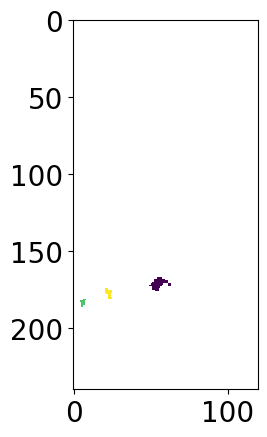

In [42]:
city_len = 1860

h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
pop_path = f'{h08dir}/global_city/dat/pop_tot_/GPW4ag__20100000.gl5'
pop = np.fromfile(pop_path, dtype='float32').reshape(2160, 4320)
riv_path = f'{h08dir}/wsi/dat/riv_out_/W5E5LR__00000000.gl5'
rivout = np.fromfile(riv_path, dtype='float32').reshape(2160, 4320)
msk_dir = f'{h08dir}/global_city/dat/vld_cty_'
cnt_dir = f'{h08dir}/global_city/dat/cty_cnt_/gpw4'
prf_dir = f'{h08dir}/global_city/dat/cty_prf_'

lonlat_path = f'{h08dir}/global_city/dat/cty_lst_/gpw4/WUP2018_300k_2010.txt'
with open(lonlat_path, "r") as input_file:
    lines = input_file.readlines()

CMY = []
world = np.zeros((2160, 4320))

for i in range(city_len):
    city_num = i+1
    msk_path = f'{msk_dir}/city_{city_num:08}.gl5'
    prf_path = f'{prf_dir}/vld_cty_/city_{city_num:08}.gl5'
    
    if not os.path.exists(prf_path):
        print(f'{i+1} is invalid prf')
        
    else:
        msk = np.fromfile(msk_path, dtype='float32').reshape(2160, 4320)
        pop_msk = np.ma.masked_where(msk != 1, pop)
        pop_sum = np.sum(pop_msk)
        prf = np.fromfile(prf_path, dtype='float32').reshape(2160, 4320)
        supply = np.ma.masked_where(msk != 1, rivout)
        supply_sum = np.sum(supply) * 60 * 60 * 24 * 365 / (1000) # m3/year
        
        cmy = supply_sum/pop_sum # m3/year/person
        CMY.append([city_num, cmy])
        
        if np.sum(world[msk == 1]) < 1:
            world[msk == 1] = cmy

    print(city_num, cmy)

upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(135, 145, 30, 50)
region = world[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)
plt.imshow(region_masked)
plt.show()

# save 1860 array
cmy_array = np.array(CMY)
savepath = f'{h08dir}/wsi/dat/cmy/cmy.npy'
np.save(savepath, cmy_array)

world_array = np.array(world)
savepath = f'{h08dir}/wsi/dat/cmy/world.npy'
np.save(savepath, world_array)